# Cooling in HII regions

In [3]:
import sys
sys.path.insert(0, '../python')

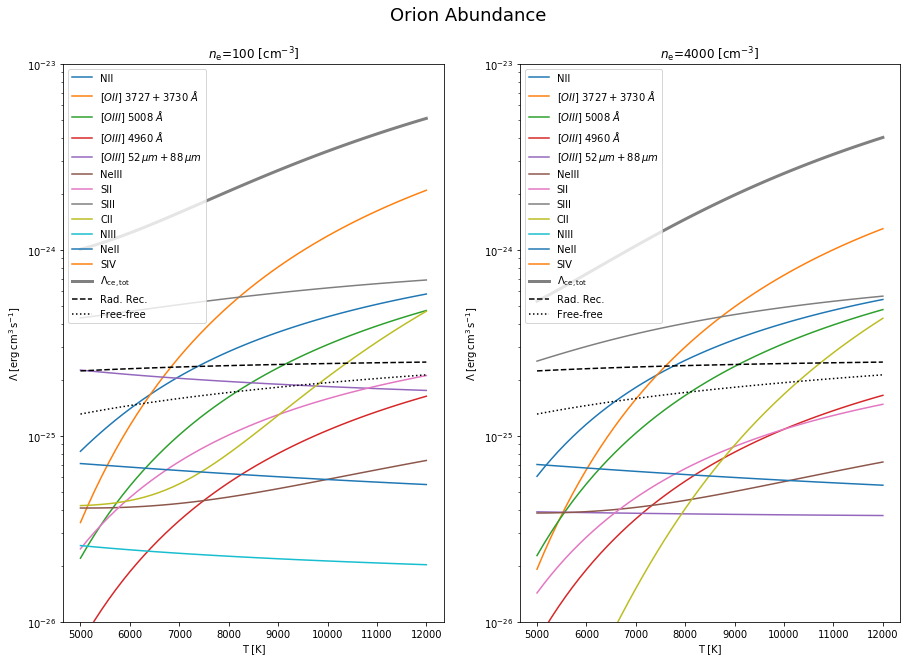

In [4]:
import cool_tigress as ct

T = np.linspace(5e3, 1.2e4, num=50)
kind = 'AGN2'
kind = 'Orion'
#kind = 'Lexington'
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
plt.sca(axes[0])
n_e = 1e2
lc = ct.LineCool(n_e=n_e, T=T, kind=kind)
lcool = lc.get_linecool_all()
for e in lc.Elem:
    if e.name == 'OIII':
        cool1 = lcool[e.name]['5008A']/lc.n_e
        cool2 = lcool[e.name]['4960A']/lc.n_e
        cool3 = (lcool[e.name]['88mu'] + lcool[e.name]['52mu'])/lc.n_e
        plt.plot(lc.T, cool1, label=r'$[OIII]\;5008\;\AA$')
        plt.plot(lc.T, cool2, label=r'$[OIII]\;4960\;\AA$')
        plt.plot(lc.T, cool3, label=r'$[OIII]\;52\,\mu m + 88\,\mu m$')
    elif e.name == 'OII':
        cool1 = lcool[e.name]['3727A']/lc.n_e
        cool2 = lcool[e.name]['3730A']/lc.n_e
        plt.plot(lc.T, cool1 + cool2, label=r'$[OII]\;3727 + 3730\;\AA$')
        #plt.plot(lc.T, cool1, label=r'$[OII]\;3727\;\AA$')
        #plt.plot(lc.T, cool2, label=r'$[OII]\;3730\;\AA$')
    else:
        cool = lcool[e.name]['tot']/lc.n_e
        # Plot only non-zero cooling rates
        if any(cool):
            plt.plot(lc.T, cool, label=e.name)
        
plt.plot(lc.T, lc.cooling_ce_tot/lc.n_e, c='grey', lw=3.0, label=r'$\Lambda_{\rm ce, tot}$')
plt.plot(lc.T, lc.cooling_rr/lc.n_e, c='k', ls='--', label='Rad. Rec.')
plt.plot(lc.T, lc.cooling_ff/lc.n_e, c='k', ls=':', label='Free-free')
plt.yscale('log')
ylim = plt.gca().get_ylim()
#plt.ylim(ylim[1]*1e-3, ylim[1])
plt.ylim(1e-26, 1e-23)
plt.legend()
plt.title(r'$n_{\rm e}$' + '={0:g}'.format(n_e) + r' [${\rm cm}^{-3}$]')
plt.xlabel('T [K]')
plt.ylabel(r'$\Lambda\;[{\rm erg}\,{\rm cm}^3\,{\rm s}^{-1}$]')

plt.sca(axes[1])
n_e = 4e3
lc = ct.LineCool(n_e=n_e, T=T, kind=kind)
lcool = lc.get_linecool_all()
for e in lc.Elem:
    if e.name == 'OIII':
        cool1 = lcool[e.name]['5008A']/lc.n_e
        cool2 = lcool[e.name]['4960A']/lc.n_e
        cool3 = (lcool[e.name]['88mu'] + lcool[e.name]['52mu'])/lc.n_e
        plt.plot(lc.T, cool1, label=r'$[OIII]\;5008\;\AA$')
        plt.plot(lc.T, cool2, label=r'$[OIII]\;4960\;\AA$')
        plt.plot(lc.T, cool3, label=r'$[OIII]\;52\,\mu m + 88\,\mu m$')
    elif e.name == 'OII':
        cool1 = lcool[e.name]['3727A']/lc.n_e
        cool2 = lcool[e.name]['3730A']/lc.n_e
        plt.plot(lc.T, cool1 + cool2, label=r'$[OII]\;3727 + 3730\;\AA$')
        #plt.plot(lc.T, cool1, label=r'$[OII]\;3727\;\AA$')
        #plt.plot(lc.T, cool2, label=r'$[OII]\;3730\;\AA$')
    else:
        cool = lcool[e.name]['tot']/lc.n_e
        # Plot only non-zero cooling rates
        if any(cool):
            plt.plot(lc.T, cool, label=e.name)
        
plt.plot(lc.T, lc.cooling_ce_tot/lc.n_e, c='grey', lw=3.0, label=r'$\Lambda_{\rm ce, tot}$')
plt.plot(lc.T, lc.cooling_rr/lc.n_e, c='k', ls='--', label='Rad. Rec.')
plt.plot(lc.T, lc.cooling_ff/lc.n_e, c='k', ls=':', label='Free-free')
plt.yscale('log')
ylim = plt.gca().get_ylim()
#plt.ylim(ylim[1]*1e-3, ylim[1])
plt.ylim(1e-26, 1e-23)
plt.legend()
plt.title(r'$n_{\rm e}$' + '={0:g}'.format(n_e) + r' [${\rm cm}^{-3}$]')
plt.xlabel('T [K]')
plt.ylabel(r'$\Lambda\;[{\rm erg}\,{\rm cm}^3\,{\rm s}^{-1}$]')

plt.suptitle('{:s} Abundance'.format(lc.kind), fontsize=18, va='top')
plt.subplots_adjust(top=0.9)

# Get Einstein A

In [23]:
Elem = ct.LineCoolElemEnum
Tran = ct.LineCoolTransitionEnum
A = dict()
for EE_ in Elem:
    A['_'.join((EE_.name, Tran.T01.name))] = float(ct.get_EinsteinA(EE_, Tran.T01))

A

{'NI_T01': 7.566e-06,
 'NII_T01': 2.077e-06,
 'OI_T01': 8.865e-05,
 'OII_T01': 4.124e-05,
 'OIII_T01': 2.664e-05,
 'NeIII_T01': 0.005974,
 'SII_T01': 0.000632,
 'SIII_T01': 0.000472,
 'CII_T01': 2.321e-06,
 'CIII_T01': 0.0,
 'NIII_T01': 27659.5881240195,
 'NeII_T01': 70.06845694500001,
 'SIV_T01': 227.3268213}

In [22]:
'_'.join(('A','B'))

'A_B'